## OVERVIEW

In [63]:
import pandas as pd 
food_df = pd.read_csv('food_claims_2212.csv')

The original data is 2000 rows and 8 columns. The first thing I did was to check each column in the data to make sure that every value match the given description. I used Python with library Pandas as a tool to do it. Results:

In [64]:
#Overview about type of each column 
food_df.dtypes

claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object

In [65]:
#Overview: Numbers of Missing values in each column 
food_df.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

## DATA VALIDATION

**_claim_id_**: True

**_time_to_close_**: True

In [66]:
#type is integer. 
#Check if all are larger than 0: 
len(food_df[food_df['time_to_close']<0]) 
#if output = 0 => True

0

**_claim_amount_**: This column must be fixed, because it's type was string because of the currency at the beginning of each value.

In [67]:
#remove 'R'
food_df['claim_amount'] = food_df['claim_amount'].str.replace('R', '')
#remove '$' and convert string to float
food_df['claim_amount'] = food_df['claim_amount'].str.replace('$', '').astype(float)
#round to 2 decimal places 
food_df['claim_amount'].round(2)

0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64

**_amount_paid_**: This column must also be fixed because of missing values. There were 36 missing values. 

In [68]:
#calculate median 
amount_paid_median = food_df['amount_paid'].median() 
#replace all missing values by median
food_df['amount_paid'] = food_df['amount_paid'].fillna(amount_paid_median)
#round to 2 decimal places 
food_df['amount_paid'].round(2)

0       51231.37
1       42111.30
2       23986.30
3       27942.72
4       16251.06
          ...   
1995    24265.02
1996     4772.77
1997    10087.81
1998    23310.24
1999     6417.92
Name: amount_paid, Length: 2000, dtype: float64

**_location_**: True

In [69]:
#checked if all values are one of RECIFE', 'SAO LUIS', 'FORTALEZA' or 'NATAL'
print(food_df['location'].isin(['RECIFE', 'SAO LUIS', 'FORTALEZA', 'NATAL']).all())

True


**_individuals_on_claim_**: True (same as time_to_close)


**_linked_case_**: True (column type is bool <code above>, which means that every value is True or False)

**_cause_**: This column must be also fixed, because of some words in incorrected format: 
- uppercase 
- white space  
- plural

In [70]:
print(food_df['cause'].isin(['vegetable', 'meat', 'unknown']).all())
#output: False, because of some words in incorrected format

False


In [71]:
food_df['cause'] = food_df['cause'].str.lower()
food_df['cause'] = food_df['cause'].str.replace(" ", "")
food_df['cause'] = food_df['cause'].str.replace('vegetables', 'vegetable')



In [72]:
print(food_df['cause'].isin(['vegetable', 'meat', 'unknown']).all())
#After fixing, output is now True

True


## DATA DISCOVERY AND VISUALIZATION

## 1. Where is the legal office that receives the most claims?
There are four types of locations included in this data. As we can see from the Graph 1, we can see that the total amount of claims for food poisoning is not evenly distributed across the four locations of the Vivendo fast food chain.

The highest amount of compensation claims was reported in Recife, which is significantly higher than the amount reported in the other locations. Natal and Fortaleza reported similar amounts of compensation claims. Sao Luis had the lowest amount of compensation claims. 


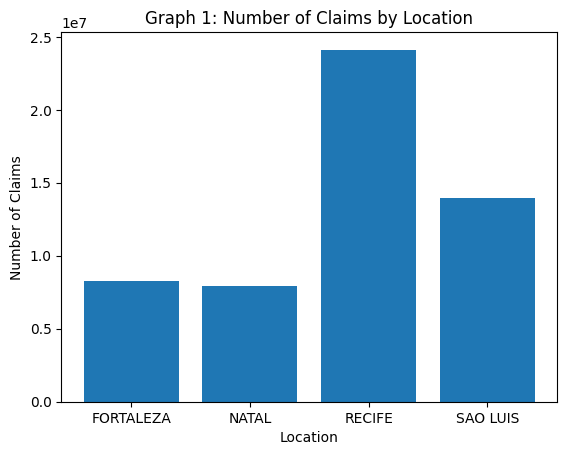

In [73]:
from matplotlib import pyplot as plt 

#Group values by location
group_by_location = food_df.groupby(['location'])

plt.bar(group_by_location.groups.keys(), group_by_location['claim_amount'].sum())

plt.title('Graph 1: Number of Claims by Location')
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.show()

## 2. How many days does it usually take the legal team to close a claim? 
Now, we will have a look on how the number of days needed for closing claims distributed. Looking at the Graph 2, we can see that normally, the office needs about 180-200 days (half a year) to deal with claims. There are some outliers that take 500 days to close but this is very uncommon. 

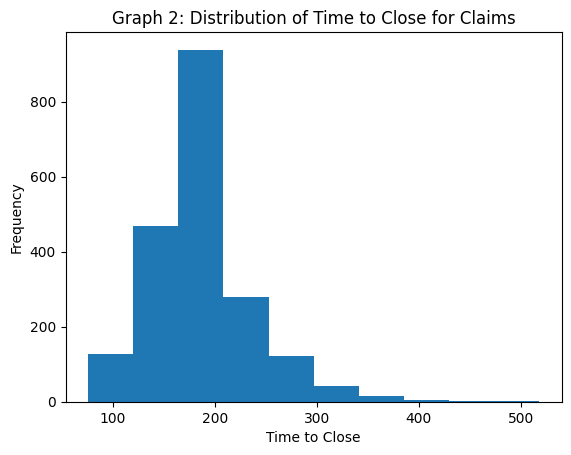

In [74]:

plt.hist(food_df['time_to_close'], bins=10)
plt.xlabel('Time to Close')
plt.ylabel('Frequency')
plt.title('Graph 2: Distribution of Time to Close for Claims')
plt.show()

## 3. How does the number of days to close claim vary across each location?
As we can see from Graph 3, the interquartile ranges for time to close are almost the same across all locations, it suggests that there may not be a significant difference in the time it takes to close claims across locations. 



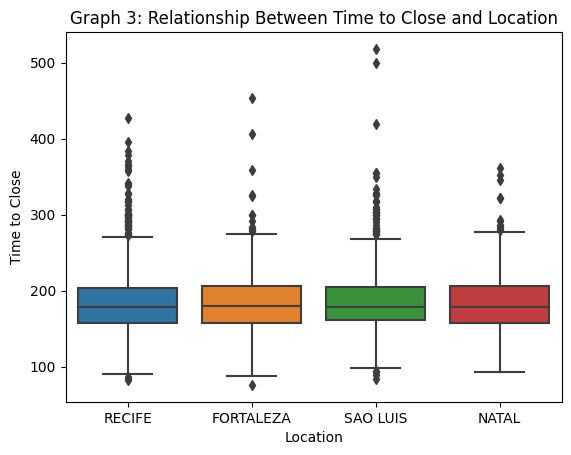

In [75]:
import seaborn as sns

sns.boxplot(x='location', y='time_to_close', data=food_df)

plt.xlabel('Location')
plt.ylabel('Time to Close')
plt.title('Graph 3: Relationship Between Time to Close and Location')

plt.show()